In [9]:
from api.BinanceData import BinanceData
from utils.CleanData import CleanData
from variables.QuantitativeFunc import QuantitativeFunc
from variables.Target import Target
from variables.TradingIndicators import TradingIndicators
import pandas as pd

In [10]:
# Import de données
BinanceData = BinanceData()
data = BinanceData.load_data("BTCUSDT", days=30)

# Nettoyage des données 
cleaner = CleanData()
data = cleaner.clean_klines_data(data)

# Export des données pour travailler sur un ficheir Excel plutôt que de requêter l'API Binance à chaque fois
data.to_excel("../data/données_test.xlsx", index=False)

In [11]:
# Import des données depuis le fichier Excel
data = pd.read_excel("../data/données_test.xlsx")

# Création des variables rendement et la cible 
data["return"] = QuantitativeFunc.return_(data['close'])
data["return_10"] = QuantitativeFunc.return_10(data['close'])
data["target"] = Target.compute(data["return"], threshold=0.0005)

# ajout des indicateurs techniques
data = TradingIndicators.add_sma(data, price_col="close", window=20, new_col="SMA_20")
data = TradingIndicators.add_ema(data, price_col="close", window=12, new_col="EMA_12")
data = TradingIndicators.add_macd(data, price_col="close")
data = TradingIndicators.add_bollinger_bands(data, price_col="close")
data = TradingIndicators.add_rsi(data, price_col="close")
data = TradingIndicators.add_atr(data, high_col="high", low_col="low", close_col="close", window=14, new_col="ATR_14")
data = TradingIndicators.add_high_low_range(data, high_col="high", low_col="low")
data = TradingIndicators.add_buy_pressure(data, high_col="high", low_col="low", close_col="close")
data = TradingIndicators.add_realized_volatility(data, returns_col="return", window=14)

print(data.head(60))
print(len(data))
print(data.columns)
print(data["target"].value_counts())

             open_time       open       high        low      close     volume  \
0  2025-08-24 13:40:00  114714.17  114714.18  114576.43  114643.19   40.94075   
1  2025-08-24 13:45:00  114643.19  114781.21  114625.84  114734.65  125.02312   
2  2025-08-24 13:50:00  114734.66  114734.66  114625.96  114625.97   37.79336   
3  2025-08-24 13:55:00  114625.96  114625.97  114555.00  114555.00   53.41280   
4  2025-08-24 14:00:00  114555.00  114564.69  114382.64  114459.10  139.15520   
5  2025-08-24 14:05:00  114459.11  114542.89  114381.37  114381.37   56.62584   
6  2025-08-24 14:10:00  114381.38  114436.11  114350.57  114400.00   75.14033   
7  2025-08-24 14:15:00  114400.01  114600.94  114378.99  114498.64  106.83559   
8  2025-08-24 14:20:00  114498.64  114582.76  114409.82  114511.07   43.40375   
9  2025-08-24 14:25:00  114511.08  114522.54  114454.27  114454.93   36.10632   
10 2025-08-24 14:30:00  114454.93  114487.48  114402.65  114481.75   67.12763   
11 2025-08-24 14:35:00  1144

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Prix de clôture (noir, trait plein)
plt.plot(data["open_time"], data["close"], label="Close", color="black", linestyle="-", linewidth=1)

# Moyennes mobiles (pointillés)
plt.plot(data["open_time"], data["SMA_20"], label="SMA 20", color="blue", linestyle="--", linewidth=1)
plt.plot(data["open_time"], data["EMA_12"], label="EMA 12", color="orange", linestyle="--", linewidth=1)

# Bandes de Bollinger (pointillés verts)
plt.plot(data["open_time"], data["Bollinger_Upper"], label="Bollinger Upper", color="green", linestyle=":", linewidth=1)
plt.plot(data["open_time"], data["Bollinger_Lower"], label="Bollinger Lower", color="green", linestyle=":", linewidth=1)

# Remplir l'espace entre les bandes (optionnel)
plt.fill_between(data["open_time"], data["Bollinger_Lower"], data["Bollinger_Upper"], color="green", alpha=0.1)

# Légende et grille
plt.title("Prix avec SMA, EMA et Bollinger Bands (5min)")
plt.xlabel("Temps")
plt.ylabel("Prix")
plt.legend()
plt.grid(True)

plt.show()

In [12]:
#Test du LOGIT
from models.Models import CryptoModel

crypto_model = CryptoModel(data)

# Régression logistique
logit_model = crypto_model.logistic_regression(test_size=0.2)




ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

c:\Users\BOULMEDAIS\Desktop\Cours Master\ABDIF\bigdata-project\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:40:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost Metrics ===
Accuracy : 0.9977
Precision: 0.9967
Recall   : 0.9900
F1-score : 0.9933
Confusion Matrix:
[[1426    1]
 [   3  298]]

=== Feature Importances ===
                feature  importance
8                return    0.614850
20         Buy_Pressure    0.152630
19       High_Low_Range    0.116940
5    quote_asset_volume    0.027809
7       taker_buy_quote    0.025753
9             return_10    0.013231
6      number_of_trades    0.011879
17               RSI_14    0.006044
15      Bollinger_Upper    0.004736
13          MACD_Signal    0.003926
16      Bollinger_Lower    0.003688
1                  high    0.003517
18               ATR_14    0.003283
12                 MACD    0.002402
4                volume    0.002213
10               SMA_20    0.002091
21  Realized_Volatility    0.001695
14        Bollinger_SMA    0.001355
0                  open    0.001175
2                   low    0.000429
3                 close    0.000353
11               EMA_12    0.000000


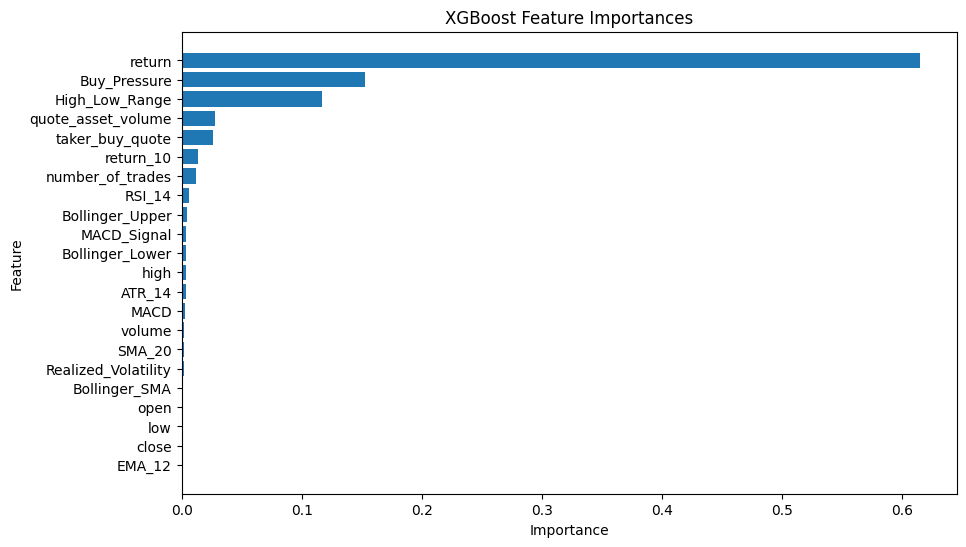

In [13]:
# Test du XGBoost
from models.Models import CryptoModel

crypto_model = CryptoModel(data)

# XGBoost
xgb_model = crypto_model.xgboost_classification(test_size=0.2)
